In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# pip install textblob

In [3]:
# Load the DataFrame (replace with your actual data loading step)
df = pd.read_csv('./pr_sharing_visualize_output_with_patterns.csv')
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,MergedAt,UpdatedAt,...,CSharing_URL,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Detected_Patterns
0,pull request,https://github.com/PYT-Acadamy/PYT-Acadamy.git...,david-star-git,PYT-Acadamy/PYT-Acadamy.github.io,HTML,20,git und github tutorial,ich habe 'https://youtubetranscript.com/?v=mJ-...,2023-07-22T14:08:36Z,2023-07-22T14:08:36Z,...,https://chat.openai.com/share/6a1f6db3-3ea1-44...,200,"July 21, 2023",Simple Git and GitHub.,3,3647,2192,every resource about git or github\nif you loo...,Title: A Simple Guide to Git and GitHub for Be...,Output Automator Pattern
1,pull request,https://github.com/PYT-Acadamy/PYT-Acadamy.git...,david-star-git,PYT-Acadamy/PYT-Acadamy.github.io,HTML,20,git und github tutorial,ich habe 'https://youtubetranscript.com/?v=mJ-...,2023-07-22T14:08:36Z,2023-07-22T14:08:36Z,...,https://chat.openai.com/share/6a1f6db3-3ea1-44...,200,"July 21, 2023",Simple Git and GitHub.,3,3647,2192,use the words he used to describe things,"Title: A Simple Guide to Git and GitHub, Expla...",Output Automator Pattern
2,pull request,https://github.com/PYT-Acadamy/PYT-Acadamy.git...,david-star-git,PYT-Acadamy/PYT-Acadamy.github.io,HTML,20,git und github tutorial,ich habe 'https://youtubetranscript.com/?v=mJ-...,2023-07-22T14:08:36Z,2023-07-22T14:08:36Z,...,https://chat.openai.com/share/6a1f6db3-3ea1-44...,200,"July 21, 2023",Simple Git and GitHub.,3,3647,2192,übersetze das auf deutsch,Titel: Ein einfacher Leitfaden zu Git und GitH...,Output Automator Pattern
3,pull request,https://github.com/dantebarbieri/pi-picture-fr...,dantebarbieri,dantebarbieri/pi-picture-frame,Shell,3,Add code from ChatGPT,https://chat.openai.com/share/76af53fb-7cc5-4f...,2023-07-12T02:24:55Z,2023-07-12T02:24:55Z,...,https://chat.openai.com/share/76af53fb-7cc5-4f...,200,"Dante Barbieri•July 11, 2023",Image slideshow with `feh`,20,1495,6505,I need a bash script that executes `feh` point...,Here's a basic bash script that uses feh to di...,Simple Instruction Pattern
4,pull request,https://github.com/dantebarbieri/pi-picture-fr...,dantebarbieri,dantebarbieri/pi-picture-frame,Shell,3,Add code from ChatGPT,https://chat.openai.com/share/76af53fb-7cc5-4f...,2023-07-12T02:24:55Z,2023-07-12T02:24:55Z,...,https://chat.openai.com/share/76af53fb-7cc5-4f...,200,"Dante Barbieri•July 11, 2023",Image slideshow with `feh`,20,1495,6505,Give me the jhead script and add functionality...,Here's a more advanced script using jhead to s...,Simple Instruction Pattern


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Type                             0
URL                              0
Author                           0
RepoName                         0
RepoLanguage                   257
Number                           0
Title                            0
Body                             0
MergedAt                       765
UpdatedAt                        0
State                            0
Time_Lapsed                    312
Created_At                       0
Closed_At                      312
Additions                        0
Deletions                        0
ChangedFiles                     0
CommitsTotalCount                0
CSharing_URL                     0
CSharing_Status                  0
CSharing_DateOfConversation      0
CSharing_Title                   0
CSharing_NumberOfPrompts         0
CSharing_TokensOfPrompts         0
CSharing_TokensOfAnswers         0
Conversation_Prompt              0
Conversation_Answer              0
Detected_Patterns                0
dtype: int64


In [5]:
unique_values = df['State'].unique()
print(unique_values)

['Closed' 'Open']


In [6]:
# Creating a new DataFrame where 'State' != 'Open'
filtered_without_open_df = df[df['State'] != 'Open']
print(filtered_without_open_df.isnull().sum())
print("Open: ", df[df['State'] == 'Open'].shape)
print("Closed: ", df[df['State'] == 'Closed'].shape)

Type                             0
URL                              0
Author                           0
RepoName                         0
RepoLanguage                   247
Number                           0
Title                            0
Body                             0
MergedAt                       453
UpdatedAt                        0
State                            0
Time_Lapsed                      0
Created_At                       0
Closed_At                        0
Additions                        0
Deletions                        0
ChangedFiles                     0
CommitsTotalCount                0
CSharing_URL                     0
CSharing_Status                  0
CSharing_DateOfConversation      0
CSharing_Title                   0
CSharing_NumberOfPrompts         0
CSharing_TokensOfPrompts         0
CSharing_TokensOfAnswers         0
Conversation_Prompt              0
Conversation_Answer              0
Detected_Patterns                0
dtype: int64
Open:  

In [7]:
# Identifying the false positive
unique_value_merged_at = filtered_without_open_df[filtered_without_open_df['MergedAt'].isna()]['State'].unique()
print(unique_value_merged_at)

['Closed']


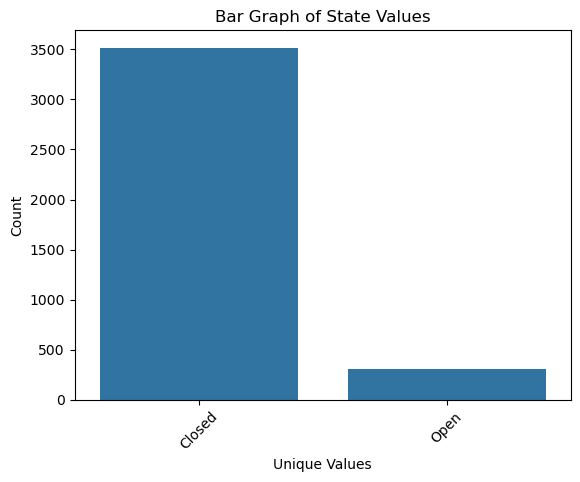

In [8]:
# Count the occurrences of each unique value in the column
value_counts = df['State'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']  # Rename columns for clarity

# Create a bar graph
sns.barplot(data=value_counts, x='Value', y='Count')

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Graph of State Values')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

In [9]:
# For numerical columns
numerical_cols = filtered_without_open_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = filtered_without_open_df[numerical_cols].corr()

# Display the correlation matrix
#print("Correlation Matrix (Numerical Columns):")
#print(correlation_matrix)

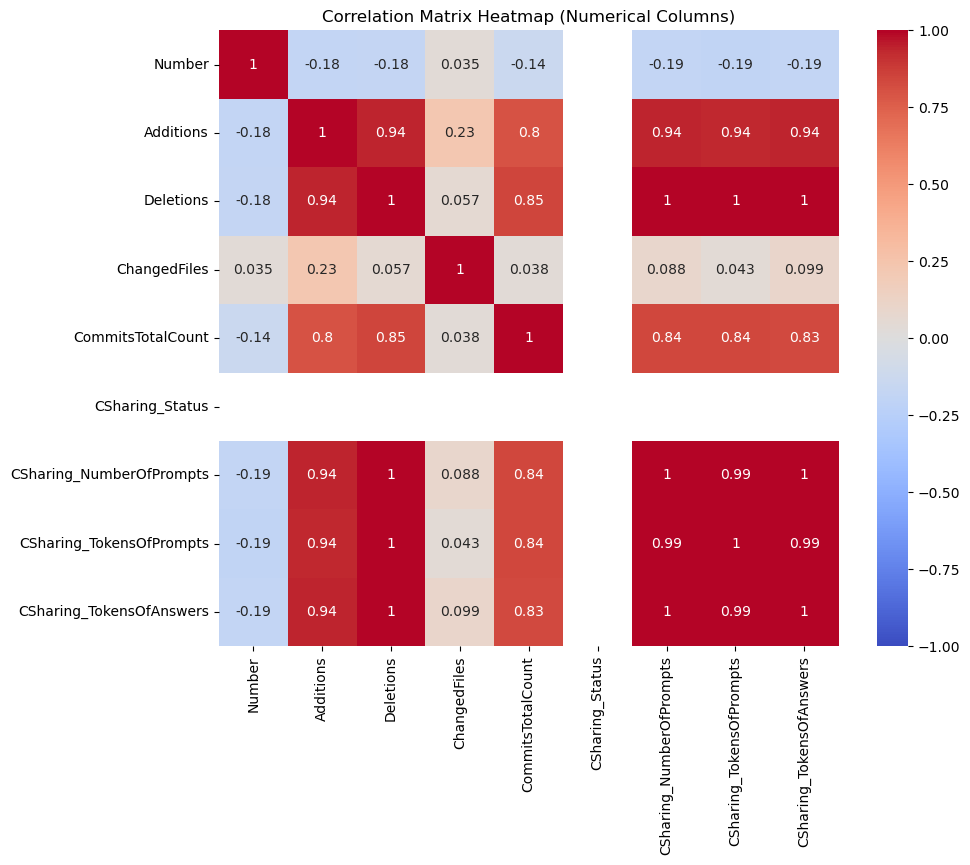

In [10]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Numerical Columns)")
plt.show()

In [11]:
# Before introducing the Effcetiveness_score
categorical_cols = filtered_without_open_df.select_dtypes(include=['object']).columns

df_copy = filtered_without_open_df.copy()

label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
    label_encoders[col] = le

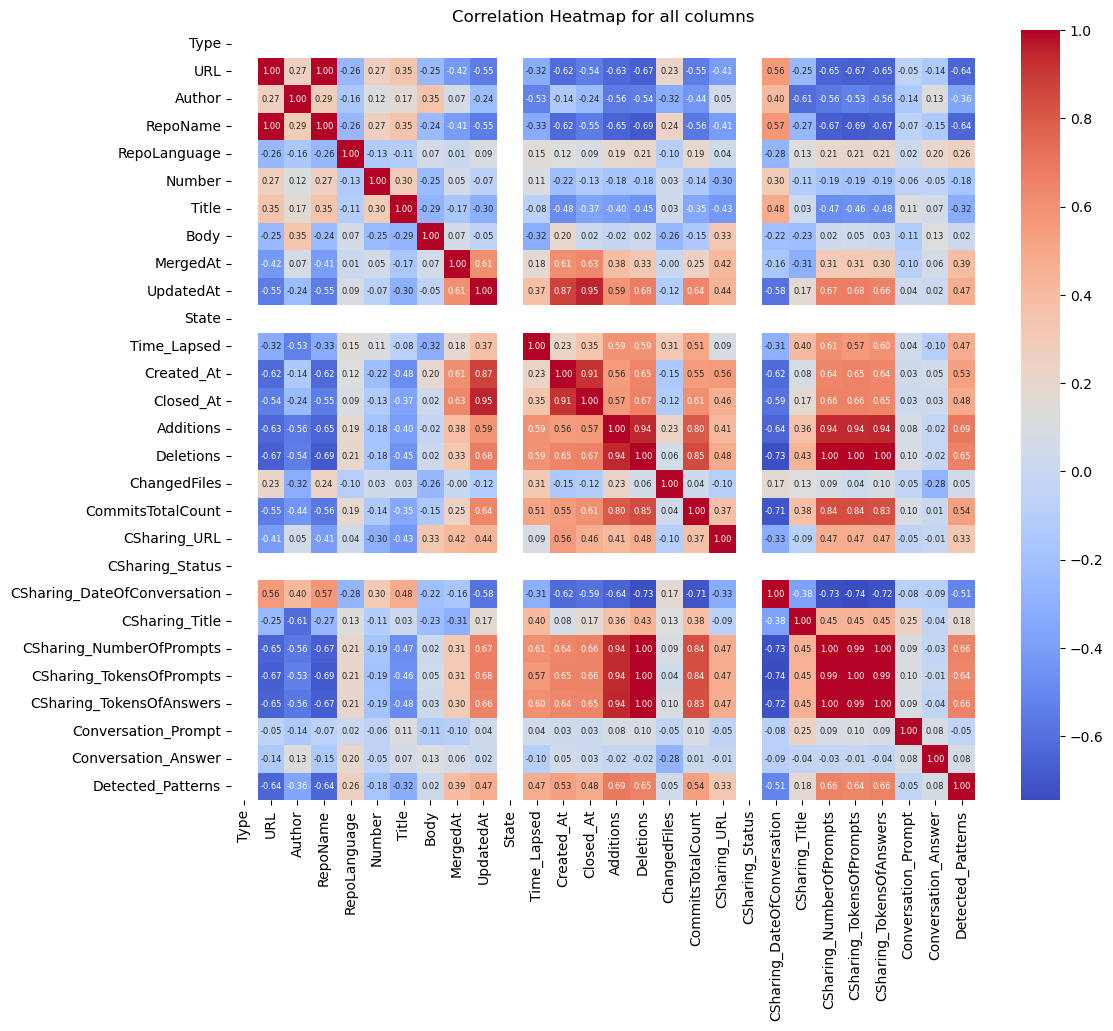

In [12]:
correlation_matrix = df_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap for all columns")
plt.xticks()
plt.yticks()
plt.show()

In [13]:
# On the basis of above correlation matrix chose columns for calculating the effectiveness of the prompt 
filtered_without_open_df['Conversation_Answer'] = filtered_without_open_df['Conversation_Answer'].astype(str)

# Define the effectiveness calculation function
def calculate_effectiveness(row):
    # Calculate response length score
    response_length_score = len(row['Conversation_Answer'].split()) if row['Conversation_Answer'] else 0
    
    # Calculate the prompt-answer token ratio
    prompt_answer_ratio = row['CSharing_TokensOfAnswers'] / (row['CSharing_TokensOfPrompts'] + 1)  # Adding 1 to avoid division by zero
    
    # Sentiment Analysis (if Conversation_Answer is non-empty)
    sentiment_score = TextBlob(row['Conversation_Answer']).sentiment.polarity if row['Conversation_Answer'] else 0

    # Weight these metrics to form a composite effectiveness score
    effectiveness_score = (0.5 * response_length_score + 0.3 * prompt_answer_ratio + 0.2 * sentiment_score)
    return effectiveness_score

# Apply the function to calculate the effectiveness score
filtered_without_open_df['Effectiveness_Score'] = filtered_without_open_df.apply(calculate_effectiveness, axis=1)

# Display the DataFrame with the new Effectiveness_Score column
print(filtered_without_open_df[['Conversation_Prompt', 'Effectiveness_Score']])

C:\Users\Dell\AppData\Local\Temp\ipykernel_8268\598930469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_without_open_df['Conversation_Answer'] = filtered_without_open_df['Conversation_Answer'].astype(str)


                                    Conversation_Prompt  Effectiveness_Score
0     every resource about git or github\nif you loo...           205.693243
1              use the words he used to describe things           280.722702
2                             übersetze das auf deutsch           277.761816
3     I need a bash script that executes `feh` point...            91.826953
4     Give me the jhead script and add functionality...            82.839024
...                                                 ...                  ...
3822  it kind of feels like the expression, if a tre...            61.515722
3823  If an OpenAI engineer to learn about our discu...           127.016388
3824           what would be a good name for this test?            30.516722
3825  Here is some rust code:\n\n```\nlet conn =\n  ...           105.514242
3826   右クリックなどで開くコンテキストメニューですが、右クリック以外にも開けるような経路はありますか？             3.183871

[3515 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_8268\598930469.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_without_open_df['Effectiveness_Score'] = filtered_without_open_df.apply(calculate_effectiveness, axis=1)


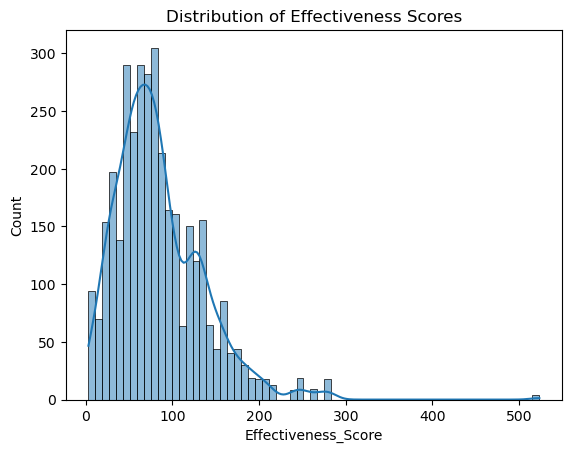

In [14]:
sns.histplot(filtered_without_open_df['Effectiveness_Score'], kde=True)
plt.title('Distribution of Effectiveness Scores')
plt.show()

In [15]:
# Split the Detected Patterns into multiple rows
filtered_without_open_df = filtered_without_open_df.assign(Detected_Pattern_split=filtered_without_open_df['Detected_Patterns'].str.split('; ')).explode('Detected_Pattern_split')

# Strip whitespace from patterns (if needed)
filtered_without_open_df['Detected_Pattern_split'] = filtered_without_open_df['Detected_Pattern_split'].str.strip()

In [16]:
# Group by individual patterns and calculate average effectiveness score
pattern_scores = filtered_without_open_df.groupby('Detected_Pattern_split')['Effectiveness_Score'].mean().reset_index()

In [17]:
# Sort patterns by effectiveness score
ranked_patterns = pattern_scores.sort_values(by='Effectiveness_Score', ascending=False)
print(ranked_patterns)

            Detected_Pattern_split  Effectiveness_Score
4                   Recipe Pattern           102.644441
0  Context and Instruction Pattern            97.334039
1         Output Automator Pattern            90.398429
5       Simple Instruction Pattern            88.351193
3                 Question Pattern            87.760302
2                  Persona Pattern            78.761773
6                 Template Pattern            75.942499


In [18]:
# Count occurrences of each pattern
pattern_frequencies = filtered_without_open_df['Detected_Pattern_split'].value_counts().reset_index()
pattern_frequencies.columns = ['Detected_Pattern_split', 'Frequency']

# Merge frequencies with effectiveness scores
pattern_analysis = ranked_patterns.merge(pattern_frequencies, on='Detected_Pattern_split')

In [19]:
# Normalize effectiveness score by frequency
pattern_analysis['Normalized_Score'] = pattern_analysis['Effectiveness_Score'] / pattern_analysis['Frequency']
print(pattern_analysis)

            Detected_Pattern_split  Effectiveness_Score  Frequency  \
0                   Recipe Pattern           102.644441        635   
1  Context and Instruction Pattern            97.334039        703   
2         Output Automator Pattern            90.398429       1900   
3       Simple Instruction Pattern            88.351193       1931   
4                 Question Pattern            87.760302       1899   
5                  Persona Pattern            78.761773        450   
6                 Template Pattern            75.942499       1143   

   Normalized_Score  
0          0.161645  
1          0.138455  
2          0.047578  
3          0.045754  
4          0.046214  
5          0.175026  
6          0.066441  


C:\Users\Dell\AppData\Local\Temp\ipykernel_8268\3808594477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pattern_analysis, x='Detected_Pattern_split', y='Normalized_Score', palette='viridis')


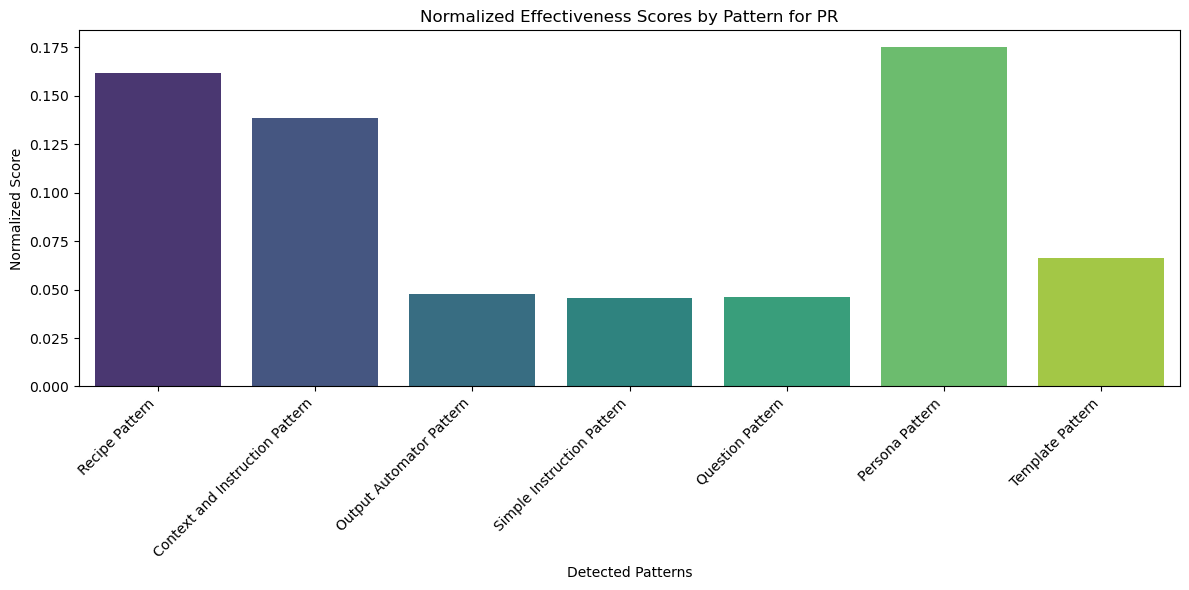

In [20]:
# Bar plot of average effectiveness scores
plt.figure(figsize=(12, 6))
sns.barplot(data=pattern_analysis, x='Detected_Pattern_split', y='Normalized_Score', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Effectiveness Scores by Pattern for PR')
plt.xlabel('Detected Patterns')
plt.ylabel('Normalized Score')
plt.tight_layout()
plt.show()

In [21]:
# Group by Detected Patterns and calculate mean scores and prompts
pattern_analysis_interactions = filtered_without_open_df.groupby('Detected_Pattern_split').agg({
    'Effectiveness_Score': 'mean',
    'CSharing_NumberOfPrompts': 'mean'
}).reset_index()

# Rename columns for clarity
pattern_analysis_interactions.rename(columns={
    'Effectiveness_Score': 'Average_Effectiveness_Score',
    'CSharing_NumberOfPrompts': 'Average_Number_Of_Prompts'
}, inplace=True)

# Calculate a combined metric (optional)
# Higher scores for patterns that have high effectiveness and fewer prompts
pattern_analysis_interactions['Score_Ratio'] = pattern_analysis_interactions['Average_Effectiveness_Score'] / pattern_analysis_interactions['Average_Number_Of_Prompts']

# Sort by the combined score
pattern_analysis_interactions = pattern_analysis_interactions.sort_values(by='Score_Ratio', ascending=False)

# Display results
print(pattern_analysis_interactions)


            Detected_Pattern_split  Average_Effectiveness_Score  \
4                   Recipe Pattern                   102.644441   
0  Context and Instruction Pattern                    97.334039   
1         Output Automator Pattern                    90.398429   
3                 Question Pattern                    87.760302   
5       Simple Instruction Pattern                    88.351193   
2                  Persona Pattern                    78.761773   
6                 Template Pattern                    75.942499   

   Average_Number_Of_Prompts  Score_Ratio  
4                   7.072441    14.513298  
0                   8.042674    12.102198  
1                   7.989474    11.314691  
3                   8.015798    10.948418  
5                   9.242361     9.559374  
2                  10.711111     7.353278  
6                 146.674541     0.517762  


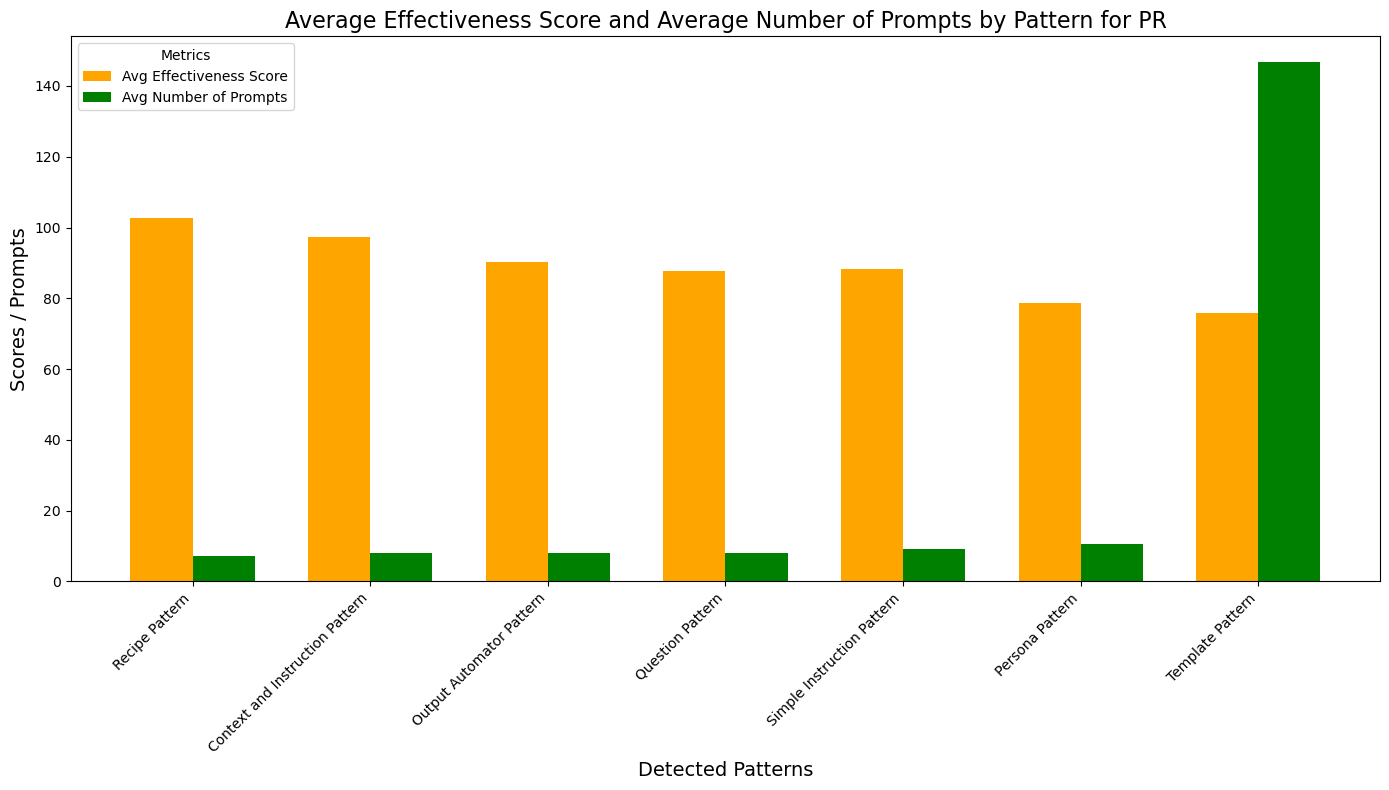

In [22]:
# Bar plot: Average Effectiveness Score and Average Number of Prompts
# Set figure size
plt.figure(figsize=(14, 8))

# Set the bar width
bar_width = 0.35

# Set positions for each bar
index = np.arange(len(pattern_analysis_interactions))

# Create the bar plot for Average Effectiveness Score (Blue bars)
plt.bar(index, pattern_analysis_interactions['Average_Effectiveness_Score'], 
        bar_width, label='Avg Effectiveness Score', color='orange')

# Create the bar plot for Average Number of Prompts (Orange bars)
plt.bar(index + bar_width, pattern_analysis_interactions['Average_Number_Of_Prompts'], 
        bar_width, label='Avg Number of Prompts', color='green')

# Add labels and title
plt.xlabel('Detected Patterns', fontsize=14)
plt.ylabel('Scores / Prompts', fontsize=14)
plt.title('Average Effectiveness Score and Average Number of Prompts by Pattern for PR', fontsize=16)

# Set X-axis ticks to match the patterns
plt.xticks(index + bar_width / 2, pattern_analysis_interactions['Detected_Pattern_split'], rotation=45, ha='right')

# Add a legend
plt.legend(title='Metrics')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8268\529534191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pattern_analysis, x='Detected_Pattern_split', y='Normalized_Score', palette='viridis', ax=axs[0])


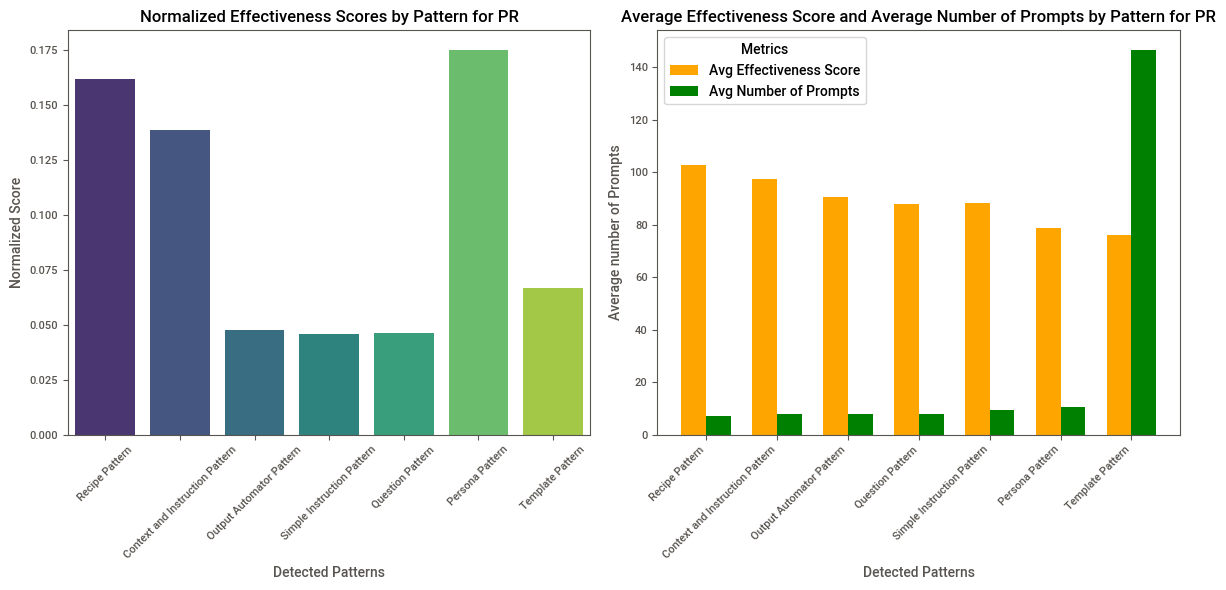

In [39]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot: Bar plot of average effectiveness scores
sns.barplot(data=pattern_analysis, x='Detected_Pattern_split', y='Normalized_Score', palette='viridis', ax=axs[0])
axs[0].set_title('Normalized Effectiveness Scores by Pattern for PR')
axs[0].set_xlabel('Detected Patterns')
axs[0].set_ylabel('Normalized Score')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot: Average Effectiveness Score and Average Number of Prompts
# Set the bar width
bar_width = 0.35

# Set positions for each bar
index = np.arange(len(pattern_analysis_interactions))

# Create the bar plot for Average Effectiveness Score (Orange bars)
axs[1].bar(index, pattern_analysis_interactions['Average_Effectiveness_Score'], 
            bar_width, label='Avg Effectiveness Score', color='orange')

# Create the bar plot for Average Number of Prompts (Green bars)
axs[1].bar(index + bar_width, pattern_analysis_interactions['Average_Number_Of_Prompts'], 
            bar_width, label='Avg Number of Prompts', color='green')

# Add labels and title for the second subplot
axs[1].set_xlabel('Detected Patterns', fontsize=10)
axs[1].set_ylabel('Average number of Prompts', fontsize=10)
axs[1].set_title('Average Effectiveness Score and Average Number of Prompts by Pattern for PR', fontsize=12)

# Set X-axis ticks to match the patterns
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(pattern_analysis_interactions['Detected_Pattern_split'], rotation=45, ha='right')

# Add a legend to the second subplot
axs[1].legend(title='Metrics')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the combined plot
plt.show()

In [24]:
# To check the association between the Detected_Patterns and Effectiveness_Score
from scipy.stats import f_oneway

# Performing ANOVA to test if the means of Effectiveness Scores differ across Detected Patterns
patterns = filtered_without_open_df['Detected_Pattern_split'].unique()
anova_result = f_oneway(*[filtered_without_open_df[filtered_without_open_df['Detected_Pattern_split'] == pattern]['Effectiveness_Score'] for pattern in patterns])
print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=27.040522610589267, pvalue=4.051746749371866e-32)


In [25]:
cat_cols = filtered_without_open_df.select_dtypes(include=['object']).columns
df_copy_2 = filtered_without_open_df.copy()

label_encoders = {}  
for col in cat_cols:
    le = LabelEncoder()
    df_copy_2[col] = le.fit_transform(df_copy_2[col].astype(str))
    label_encoders[col] = le

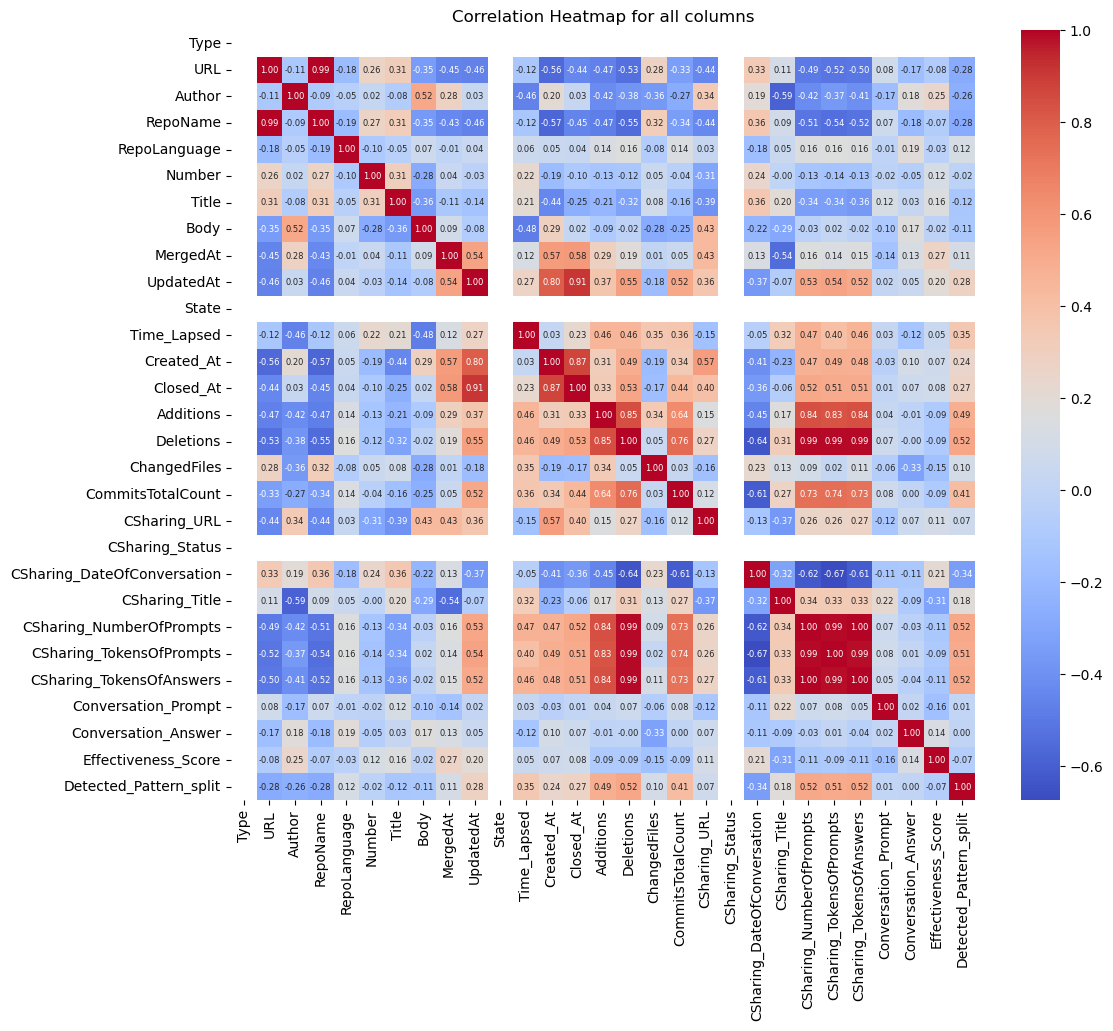

In [26]:
correlation_matrix = df_copy_2.corr()

correlation_matrix = correlation_matrix.drop('Detected_Patterns', axis=1).drop('Detected_Patterns', axis=0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap for all columns")
plt.xticks()
plt.yticks()
plt.show()

In [27]:
filtered_without_open_df.head()

import sweetviz as sv

# Generate the analysis report
report = sv.analyze(filtered_without_open_df)

# Save and display the report
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
# Encode categorical columns
df_ml =  filtered_without_open_df.drop(columns='Detected_Patterns')
cat_cols = df_ml.select_dtypes(include=['object']).columns

import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=cat_cols)
df_ml = binary_encoder.fit_transform(df_ml)

# View the encoded dataframe
print(df_ml.head())
df_ml.shape

   Type_0  URL_0  URL_1  URL_2  URL_3  URL_4  URL_5  URL_6  Author_0  \
0       1      0      0      0      0      0      0      1         0   
1       1      0      0      0      0      0      0      1         0   
2       1      0      0      0      0      0      0      1         0   
3       1      0      0      0      0      0      1      0         0   
4       1      0      0      0      0      0      1      0         0   

   Author_1  ...  Conversation_Answer_4  Conversation_Answer_5  \
0         0  ...                      0                      0   
1         0  ...                      0                      0   
2         0  ...                      0                      0   
3         0  ...                      0                      0   
4         0  ...                      0                      0   

   Conversation_Answer_6  Conversation_Answer_7  Conversation_Answer_8  \
0                      0                      0                      0   
1                     

(8661, 130)

In [29]:
# Save the DataFrame to a CSV file
df_ml.to_csv('pr_sharing_output_with_patterns_effectiveness_score.csv', index=False)